In [ ]:
pip install xarray

In [ ]:
pip install cartopy

In [1]:
import numpy as np
import pickle
import scipy.io as spio 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates 
import datetime as dt
import pandas as pd
import xarray as xr
import cartopy.crs as ccrs
import cartopy

In [2]:
#Here I load in the time-series Matlab data of the precipitation in NYC
matdict = 'NOAA_ISD_JFK_prec_inches.mat'  
mat_cyc_data = spio.loadmat(matdict)

#This is the function for converting Matlab data into python datetime
def matdnum_to_pydt(date):
    """                                                                                                                                                             
    Returns Python datetime object that is converted from a Matlab date-number.                                                                                     
    """
    
    pydt = dt.datetime.fromordinal(int(date)) - dt.timedelta(days = 366)
    frac_seconds = (date - int(date))*24
    py_dt = pydt + dt.timedelta(hours = frac_seconds)
    return py_dt

In [3]:
#Here I assign the variables 
prec= mat_cyc_data['prec_jfk'][0].tolist() 
prec_ar= mat_cyc_data['prec_jfk'][0] 
date= mat_cyc_data['prec_date'][0].tolist()
py_dates = [matdnum_to_pydt(i) for i in date]
py_d_array=np.array(py_dates)

In [4]:
psort=np.sort(prec_ar)   #sort the precipitation inches
ind=np.argsort(prec_ar)
sorted_dates=py_d_array[ind]
precip_desc=np.flipud(psort)      #reverses the order so that they are now in descending order
dates_desc=np.flipud(py_d_array[ind])
nan = ~np.isnan(precip_desc)    #Nan values get removed 
final_precip=precip_desc[nan]
final_dates=dates_desc[nan]

In [5]:
print(final_precip[0:50])   #top 50 precipitation inches

[6.26 5.61 5.   4.91 4.77 4.58 4.57 4.11 4.06 4.06 3.73 3.47 3.46 3.41
 3.41 3.19 3.11 3.11 3.09 3.07 2.98 2.93 2.9  2.9  2.84 2.77 2.72 2.68
 2.67 2.63 2.61 2.52 2.5  2.49 2.44 2.42 2.4  2.4  2.39 2.39 2.38 2.37
 2.36 2.34 2.33 2.32 2.31 2.29 2.28 2.24]


In [6]:
print(final_dates[0:50])   #Top 50 precipitation dates 

[datetime.datetime(1984, 7, 1, 0, 0) datetime.datetime(2011, 8, 14, 0, 0)
 datetime.datetime(1989, 9, 16, 0, 0) datetime.datetime(2011, 8, 28, 0, 0)
 datetime.datetime(1996, 8, 1, 0, 0) datetime.datetime(2004, 9, 29, 0, 0)
 datetime.datetime(2014, 5, 1, 0, 0) datetime.datetime(2013, 6, 8, 0, 0)
 datetime.datetime(2004, 8, 11, 0, 0)
 datetime.datetime(2005, 10, 13, 0, 0) datetime.datetime(1999, 1, 4, 0, 0)
 datetime.datetime(2007, 8, 8, 0, 0) datetime.datetime(2005, 10, 14, 0, 0)
 datetime.datetime(1983, 8, 29, 0, 0) datetime.datetime(1991, 8, 21, 0, 0)
 datetime.datetime(2014, 8, 13, 0, 0) datetime.datetime(1997, 8, 21, 0, 0)
 datetime.datetime(1980, 4, 10, 0, 0)
 datetime.datetime(2008, 12, 12, 0, 0) datetime.datetime(1981, 7, 5, 0, 0)
 datetime.datetime(2005, 10, 15, 0, 0)
 datetime.datetime(1997, 7, 25, 0, 0)
 datetime.datetime(2002, 10, 12, 0, 0)
 datetime.datetime(2014, 3, 30, 0, 0)
 datetime.datetime(1996, 10, 20, 0, 0)
 datetime.datetime(1982, 9, 28, 0, 0) datetime.datetime(1990

In [34]:
#I wrote the data into a .csv file 
from datetime import datetime, timedelta

df = pd.DataFrame(columns=['Year','Index Values'])

for i in range(0,50): 
    year_dates= final_dates[i].year
    year_dates_ind = final_dates[i].timetuple().tm_yday
    final_year_ind = year_dates_ind - 1
    
    df = df.append({'Year': year_dates, 'Index Values': final_year_ind}, ignore_index=True)
    df.to_csv('top50_precip.csv')

In [35]:
for i in range(0,50): 
    print(final_dates[i].date())

1984-07-01
2011-08-14
1989-09-16
2011-08-28
1996-08-01
2004-09-29
2014-05-01
2013-06-08
2004-08-11
2005-10-13
1999-01-04
2007-08-08
2005-10-14
1983-08-29
1991-08-21
2014-08-13
1997-08-21
1980-04-10
2008-12-12
1981-07-05
2005-10-15
1997-07-25
2002-10-12
2014-03-30
1996-10-20
1982-09-28
1990-05-30
1979-01-21
2000-07-27
1998-01-24
2002-09-02
2004-07-28
1992-08-18
2000-11-10
1989-10-20
2000-06-07
1989-05-24
2010-03-30
2012-04-23
2006-04-23
1994-09-27
2014-12-10
1989-06-10
2011-08-29
2012-06-13
1986-04-17
1994-08-22
2001-06-18
1983-04-17
1985-09-28


In [7]:
#Imported necessary libraries for creating plots and reading in netcdf files 
import numpy as np
import pickle
import scipy.io as spio 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates 
import datetime as dt
from scipy.io import netcdf
import pandas as pd
import matplotlib
import cartopy.crs as ccrs
import cartopy
import matplotlib.ticker as mticker
plt.style.use('tableau-colorblind10')
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import warnings
warnings.filterwarnings("ignore")
import xarray as xr
import numpy as np

In [8]:
# I import the data from the netcdf files

# Trick to determine your current directory
download_dir = !pwd
#print(type(download_dir))
# convert from a list to a string
download_dir =' '.join(download_dir)
print(download_dir)

prec_data_file_prec = 'data_prec_top50nyc_2000.nc'
prec_data_file_pwv = 'data_pwv_top50nyc.nc'

# file names of figures to make
prec = xr.open_dataset(download_dir + '/' + prec_data_file_prec, decode_times=False)
pwv = xr.open_dataset(download_dir + '/' + prec_data_file_pwv, decode_times=False)

print(type(prec))
print(type(pwv))

#open up DataSets

avg_prec = prec['prec'].mean(dim = 'time')
print(type(avg_prec))
avg_pwv = pwv['pwv'].mean(dim = 'time')
print(type(avg_pwv))
 
#extract lat/lon values, all DataArrays have same coordinates
lat_prec = prec.lat.values
lon_prec = prec.lon.values

lat_pwv = pwv.lat.values
lon_pwv = pwv.lon.values

print(prec)
print(pwv)

/Users/jonathansmilovich/Documents/College/2022/Spring 2022/EAS 31003/PY_SP2022
<class 'xarray.core.dataset.Dataset'>
<class 'xarray.core.dataset.Dataset'>
<class 'xarray.core.dataarray.DataArray'>
<class 'xarray.core.dataarray.DataArray'>
<xarray.Dataset>
Dimensions:  (lon: 240, lat: 121, time: 50)
Coordinates:
  * lon      (lon) float32 -180.0 -178.5 -177.0 -175.5 ... 175.5 177.0 178.5
  * lat      (lat) float32 90.0 88.5 87.0 85.5 84.0 ... -85.5 -87.0 -88.5 -90.0
  * time     (time) int32 1 2 3 4 5 6 7 8 9 10 ... 41 42 43 44 45 46 47 48 49 50
Data variables:
    prec     (time, lat, lon) float32 0.04196 0.04196 0.04196 ... 0.0178 0.0178
Attributes:
    author:   James Booth
    comment:  Data source: ERA-Interim
<xarray.Dataset>
Dimensions:  (lon: 240, lat: 121, time: 50)
Coordinates:
  * lon      (lon) float32 -180.0 -178.5 -177.0 -175.5 ... 175.5 177.0 178.5
  * lat      (lat) float32 90.0 88.5 87.0 85.5 84.0 ... -85.5 -87.0 -88.5 -90.0
  * time     (time) int32 1 2 3 4 5 6 7 8 9 

NameError: name 'add_coast' is not defined

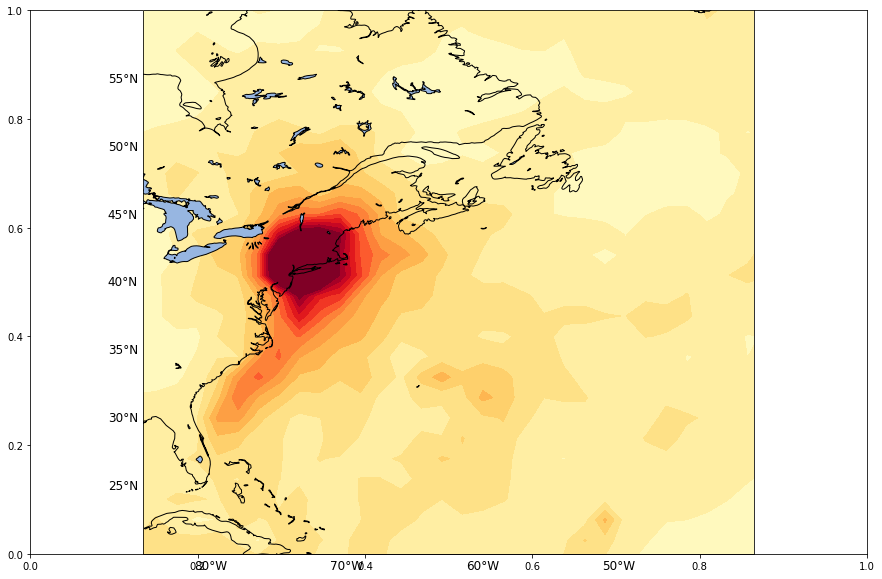

In [22]:
#Here is the plot for the average precipitatiion of the top 50 dates 

# This line describes the data projection
plt.subplots(figsize = (15,10))
projection_crs = ccrs.PlateCarree()
cmap_full = 'YlOrRd'

ax = plt.axes(projection=projection_crs)
ax.add_feature(cartopy.feature.LAKES,edgecolor='k')
ax.set_extent([-85, -40, 20, 60], crs=ccrs.PlateCarree())
ax.coastlines(resolution='50m')

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.top_labels = False
gl.right_labels = False
#gl.xlocator = mticker.FixedLocator([-75,-60,-45])
#gl.ylocator = mticker.FixedLocator([24,30,36,42,48,54])
gl.xlabel_style = {'size': 12}
gl.ylabel_style = {'size': 12}
gl.xlines = False
gl.ylines = False

min_val=0.
max_val=1.

norm_data=avg_prec

norm_data[0,0]=min_val
norm_data[0,-1]=max_val

cf1= ax.contourf(lon_prec,lat_prec, norm_data.values,\
                  transform=projection_crs, cmap=cmap_full,levels = 30,\
                  alpha=1, vmin=min_val, vmax=max_val)
# This is a call to the above function that I created
add_coast(ax,ccrs)

ticks = np.linspace(min_val, max_val,11)
c_label = '[mm hr-1]'
plt.colorbar(cf1,ax=[ax1],shrink=.75, aspect=21, pad=0.05,\
             ticks=ticks, label=c_label)

NameError: name 'add_coast' is not defined

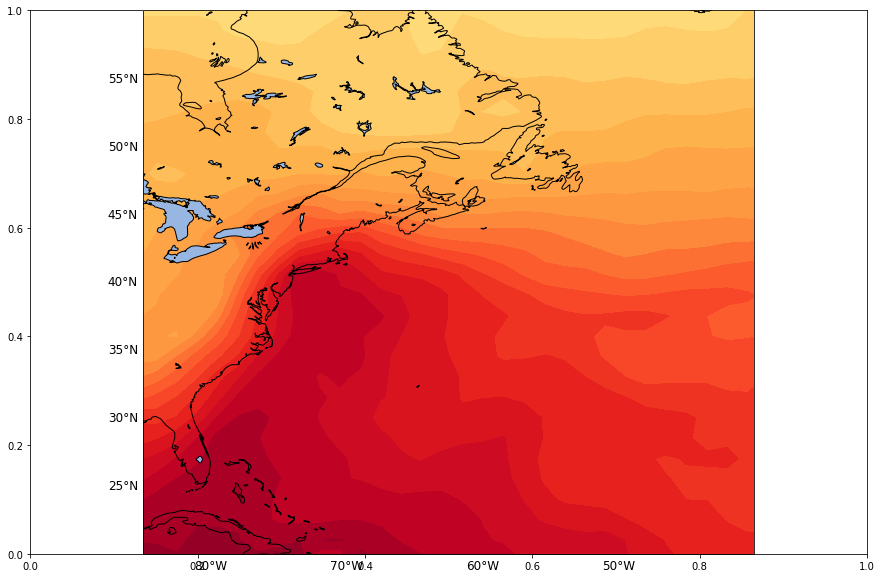

In [21]:
#Here is the plot for the average precipitable water vapor of the top 50 dates 

# This line describes the data projection
plt.subplots(figsize = (15,10))
projection_crs = ccrs.PlateCarree()
cmap_full = 'YlOrRd'

ax = plt.axes(projection=projection_crs)
ax.add_feature(cartopy.feature.LAKES,edgecolor='k')
ax.set_extent([-85, -40, 20, 60], crs=ccrs.PlateCarree())
ax.coastlines(resolution='50m')

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.top_labels = False
gl.right_labels = False
#gl.xlocator = mticker.FixedLocator([-75,-60,-45])
#gl.ylocator = mticker.FixedLocator([24,30,36,42,48,54])
gl.xlabel_style = {'size': 12}
gl.ylabel_style = {'size': 12}
gl.xlines = False
gl.ylines = False

min_val=0.
max_val=45.


norm_data=avg_pwv

norm_data[0,0]=min_val
norm_data[0,-1]=max_val

cf1= ax.contourf(lon_pwv,lat_pwv, norm_data.values,\
                  transform=projection_crs, cmap=cmap_full,levels = 30,\
                  alpha=1, vmin=min_val, vmax=max_val)
# This is a call to the above function that I created
add_coast(ax,ccrs)

ticks = np.linspace(min_val, max_val,11)
c_label = '[mm hr-1]'
plt.colorbar(cf1,ax=[ax1],shrink=.75, aspect=21, pad=0.05,\
             ticks=ticks, label=c_label)

NameError: name 'add_coast' is not defined

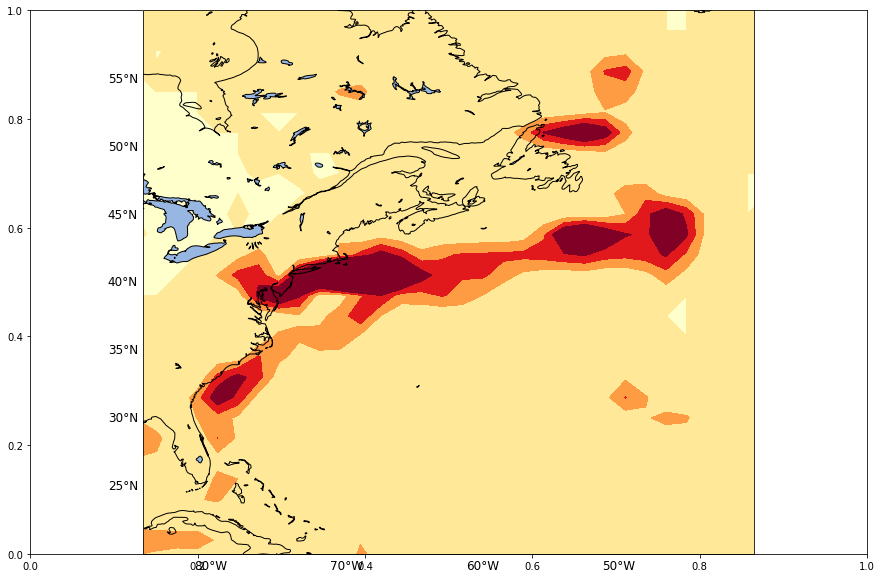

In [16]:
#Plot of precipitation on July 1st, 1984 

prec_all = prec['prec']
prec_spec= prec_all[0,:,:]  

# This line describes the data projection
plt.subplots(figsize = (15,10))
projection_crs = ccrs.PlateCarree()
cmap_full = 'YlOrRd'

ax = plt.axes(projection=projection_crs)
ax.add_feature(cartopy.feature.LAKES,edgecolor='k')
ax.set_extent([-85, -40, 20, 60], crs=ccrs.PlateCarree())
ax.coastlines(resolution='50m')

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.top_labels = False
gl.right_labels = False
#gl.xlocator = mticker.FixedLocator([-75,-60,-45])
#gl.ylocator = mticker.FixedLocator([24,30,36,42,48,54])
gl.xlabel_style = {'size': 12}
gl.ylabel_style = {'size': 12}
gl.xlines = False
gl.ylines = False

min_val=0.
max_val=1.

norm_data=prec_spec

norm_data[0,0]=min_val
norm_data[0,-1]=max_val

cf1= ax.contourf(lon_prec,lat_prec, norm_data.values,\
                  transform=projection_crs, cmap=cmap_full,levels = 30,\
                  alpha=1, vmin=min_val, vmax=max_val)
# This is a call to the above function that I created
add_coast(ax,ccrs)

ticks = np.linspace(min_val, max_val,11)
c_label = '[mm hr-1]'
plt.colorbar(cf1,ax=[ax1],shrink=.75, aspect=21, pad=0.05,\
             ticks=ticks, label=c_label)

NameError: name 'add_coast' is not defined

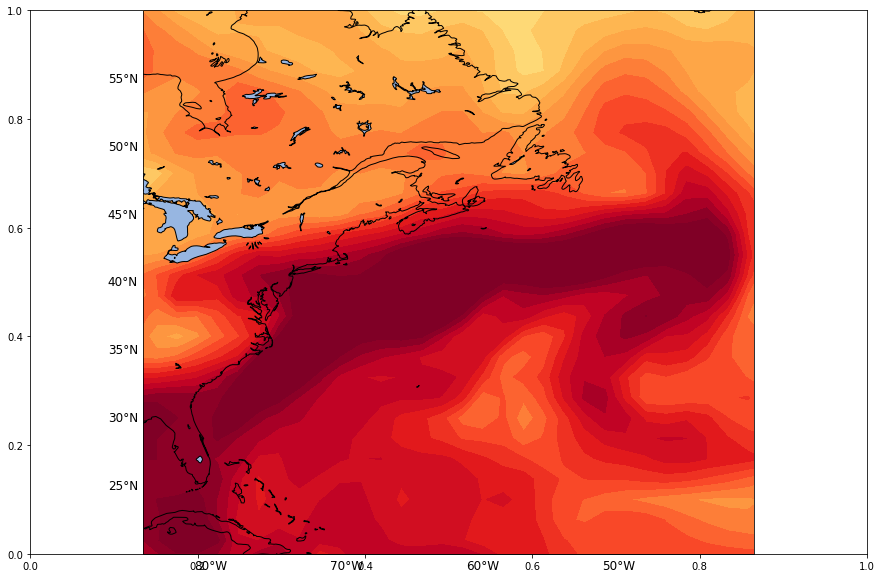

In [54]:
#Plot of precipitable water vapor on July 1st, 1984 

pwv_all = pwv['pwv']
pwv_spec= pwv_all[0,:,:]  

# This line describes the data projection
plt.subplots(figsize = (15,10))
projection_crs = ccrs.PlateCarree()
cmap_full = 'YlOrRd'

ax = plt.axes(projection=projection_crs)
ax.add_feature(cartopy.feature.LAKES,edgecolor='k')
ax.set_extent([-85, -40, 20, 60], crs=ccrs.PlateCarree())
ax.coastlines(resolution='50m')

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.top_labels = False
gl.right_labels = False
#gl.xlocator = mticker.FixedLocator([-75,-60,-45])
#gl.ylocator = mticker.FixedLocator([24,30,36,42,48,54])
gl.xlabel_style = {'size': 12}
gl.ylabel_style = {'size': 12}
gl.xlines = False
gl.ylines = False

min_val=0.
max_val=45.

norm_data=pwv_spec

norm_data[0,0]=min_val
norm_data[0,-1]=max_val

cf1= ax.contourf(lon_pwv,lat_pwv, norm_data.values,\
                  transform=projection_crs, cmap=cmap_full,levels = 30,\
                  alpha=1, vmin=min_val, vmax=max_val)
# This is a call to the above function that I created
add_coast(ax,ccrs)

ticks = np.linspace(min_val, max_val,11)
c_label = '[mm hr-1]'
plt.colorbar(cf1,ax=[ax1],shrink=.75, aspect=21, pad=0.05,\
             ticks=ticks, label=c_label)

NameError: name 'add_coast' is not defined

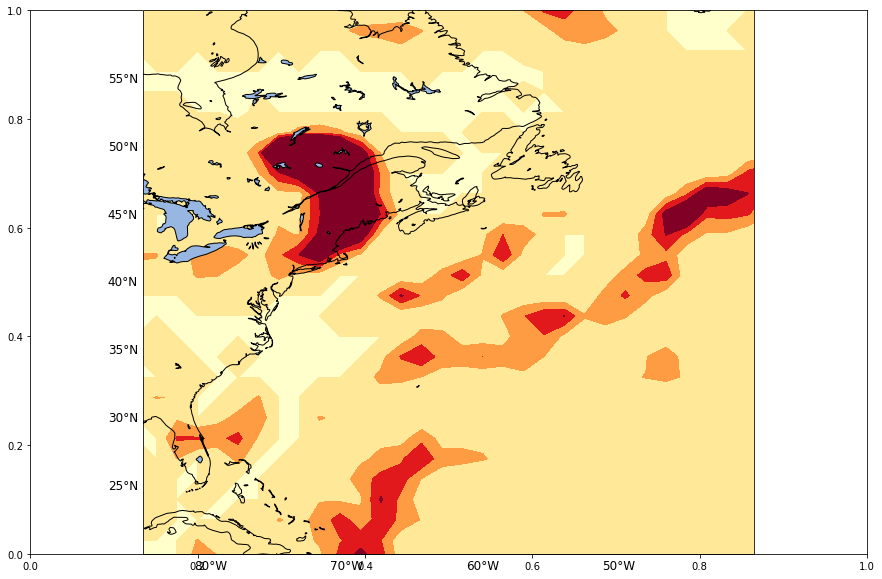

In [14]:
#Plot of precipitation on August 8th, 2007 

prec_all = prec['prec']
prec_spec= prec_all[11,:,:]  

# This line describes the data projection
plt.subplots(figsize = (15,10))
projection_crs = ccrs.PlateCarree()
cmap_full = 'YlOrRd'

ax = plt.axes(projection=projection_crs)
ax.add_feature(cartopy.feature.LAKES,edgecolor='k')
ax.set_extent([-85, -40, 20, 60], crs=ccrs.PlateCarree())
ax.coastlines(resolution='50m')

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.top_labels = False
gl.right_labels = False
#gl.xlocator = mticker.FixedLocator([-75,-60,-45])
#gl.ylocator = mticker.FixedLocator([24,30,36,42,48,54])
gl.xlabel_style = {'size': 12}
gl.ylabel_style = {'size': 12}
gl.xlines = False
gl.ylines = False

min_val=0.
max_val=1.

norm_data=prec_spec

norm_data[0,0]=min_val
norm_data[0,-1]=max_val

cf1= ax.contourf(lon_prec,lat_prec, norm_data.values,\
                  transform=projection_crs, cmap=cmap_full,levels = 30,\
                  alpha=1, vmin=min_val, vmax=max_val)
# This is a call to the above function that I created
add_coast(ax,ccrs)

ticks = np.linspace(min_val, max_val,11)
c_label = '[mm hr-1]'
plt.colorbar(cf1,ax=[ax1],shrink=.75, aspect=21, pad=0.05,\
             ticks=ticks, label=c_label)

NameError: name 'add_coast' is not defined

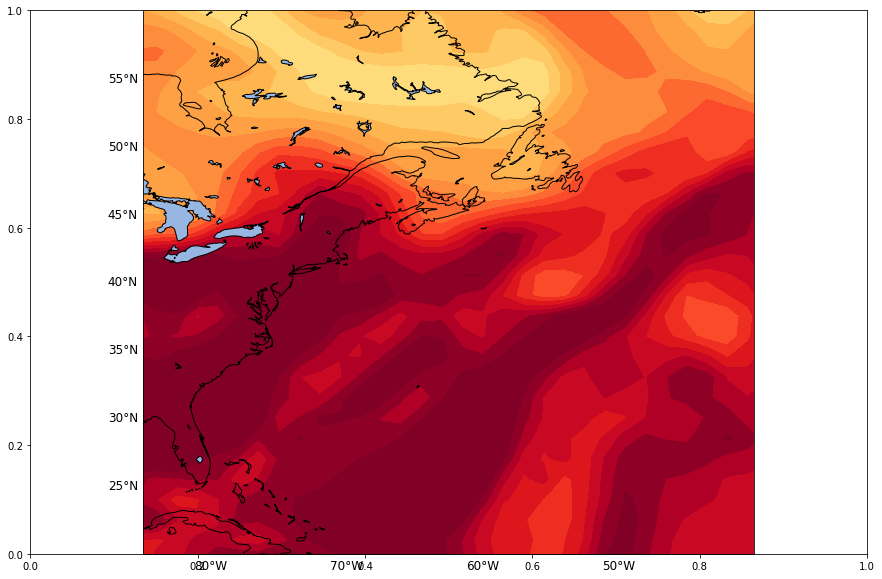

In [45]:
#Plot of precipitable water vapor on August 8th, 2007

pwv_all = pwv['pwv']
pwv_spec= pwv_all[11,:,:]  

# This line describes the data projection
plt.subplots(figsize = (15,10))
projection_crs = ccrs.PlateCarree()
cmap_full = 'YlOrRd'

ax = plt.axes(projection=projection_crs)
ax.add_feature(cartopy.feature.LAKES,edgecolor='k')
ax.set_extent([-85, -40, 20, 60], crs=ccrs.PlateCarree())
ax.coastlines(resolution='50m')

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.top_labels = False
gl.right_labels = False
#gl.xlocator = mticker.FixedLocator([-75,-60,-45])
#gl.ylocator = mticker.FixedLocator([24,30,36,42,48,54])
gl.xlabel_style = {'size': 12}
gl.ylabel_style = {'size': 12}
gl.xlines = False
gl.ylines = False

min_val=0.
max_val=45.

norm_data=pwv_spec

norm_data[0,0]=min_val
norm_data[0,-1]=max_val

cf1= ax.contourf(lon_pwv,lat_pwv, norm_data.values,\
                  transform=projection_crs, cmap=cmap_full,levels = 30,\
                  alpha=1, vmin=min_val, vmax=max_val)
# This is a call to the above function that I created
add_coast(ax,ccrs)

ticks = np.linspace(min_val, max_val,11)
c_label = '[mm hr-1]'
plt.colorbar(cf1,ax=[ax1],shrink=.75, aspect=21, pad=0.05,\
             ticks=ticks, label=c_label)

NameError: name 'add_coast' is not defined

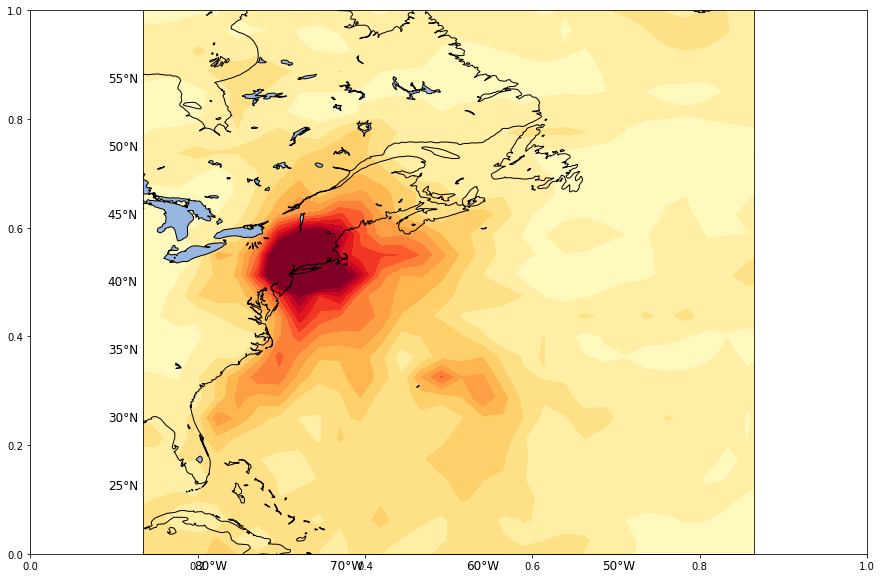

In [37]:
#Plot of precipitation of Tropical Cyclones 

prec_all = prec['prec']
prec_TC= prec_all[[0,1,2,3,5,7,8,9,13,14,15,18,19,20,21,22,23,24,25,30,31,32,34,35,37,41,43,46,49],:,:].mean(dim = 'time') 

# This line describes the data projection
plt.subplots(figsize = (15,10))
projection_crs = ccrs.PlateCarree()
cmap_full = 'YlOrRd'

ax = plt.axes(projection=projection_crs)
ax.add_feature(cartopy.feature.LAKES,edgecolor='k')
ax.set_extent([-85, -40, 20, 60], crs=ccrs.PlateCarree())
ax.coastlines(resolution='50m')

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.top_labels = False
gl.right_labels = False
#gl.xlocator = mticker.FixedLocator([-75,-60,-45])
#gl.ylocator = mticker.FixedLocator([24,30,36,42,48,54])
gl.xlabel_style = {'size': 12}
gl.ylabel_style = {'size': 12}
gl.xlines = False
gl.ylines = False

min_val=0.
max_val=1.

norm_data=prec_TC

norm_data[0,0]=min_val
norm_data[0,-1]=max_val

cf1= ax.contourf(lon_prec,lat_prec, norm_data.values,\
                  transform=projection_crs, cmap=cmap_full,levels = 30,\
                  alpha=1, vmin=min_val, vmax=max_val)
# This is a call to the above function that I created
add_coast(ax,ccrs)

ticks = np.linspace(min_val, max_val,11)
c_label = '[mm hr-1]'
plt.colorbar(cf1,ax=[ax1],shrink=.75, aspect=21, pad=0.05,\
             ticks=ticks, label=c_label)

NameError: name 'add_coast' is not defined

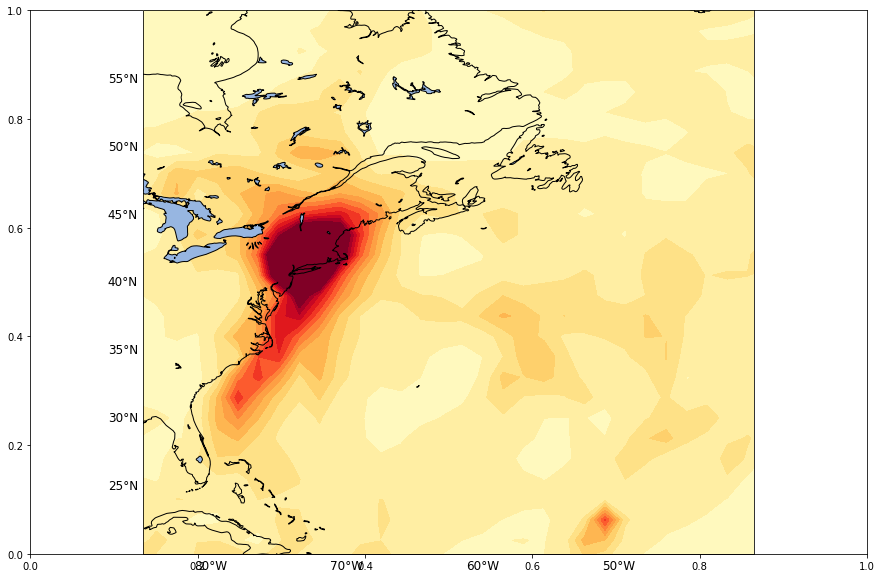

In [36]:
#Plot of precipitation of Non-Tropical Cyclones 

prec_all = prec['prec']
prec_NTC= prec_all[[4,6,10,11,12,16,17,18,26,27,28,29,33,36,38,39,40,42,44,45,47,48],:,:].mean(dim = 'time') 

# This line describes the data projection
plt.subplots(figsize = (15,10))
projection_crs = ccrs.PlateCarree()
cmap_full = 'YlOrRd'

ax = plt.axes(projection=projection_crs)
ax.add_feature(cartopy.feature.LAKES,edgecolor='k')
ax.set_extent([-85, -40, 20, 60], crs=ccrs.PlateCarree())
ax.coastlines(resolution='50m')

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.top_labels = False
gl.right_labels = False
#gl.xlocator = mticker.FixedLocator([-75,-60,-45])
#gl.ylocator = mticker.FixedLocator([24,30,36,42,48,54])
gl.xlabel_style = {'size': 12}
gl.ylabel_style = {'size': 12}
gl.xlines = False
gl.ylines = False

min_val=0.
max_val=1.

norm_data=prec_NTC

norm_data[0,0]=min_val
norm_data[0,-1]=max_val

cf1= ax.contourf(lon_prec,lat_prec, norm_data.values,\
                  transform=projection_crs, cmap=cmap_full,levels = 30,\
                  alpha=1, vmin=min_val, vmax=max_val)
# This is a call to the above function that I created
add_coast(ax,ccrs)

ticks = np.linspace(min_val, max_val,11)
c_label = '[mm hr-1]'
plt.colorbar(cf1,ax=[ax1],shrink=.75, aspect=21, pad=0.05,\
             ticks=ticks, label=c_label)

NameError: name 'add_coast' is not defined

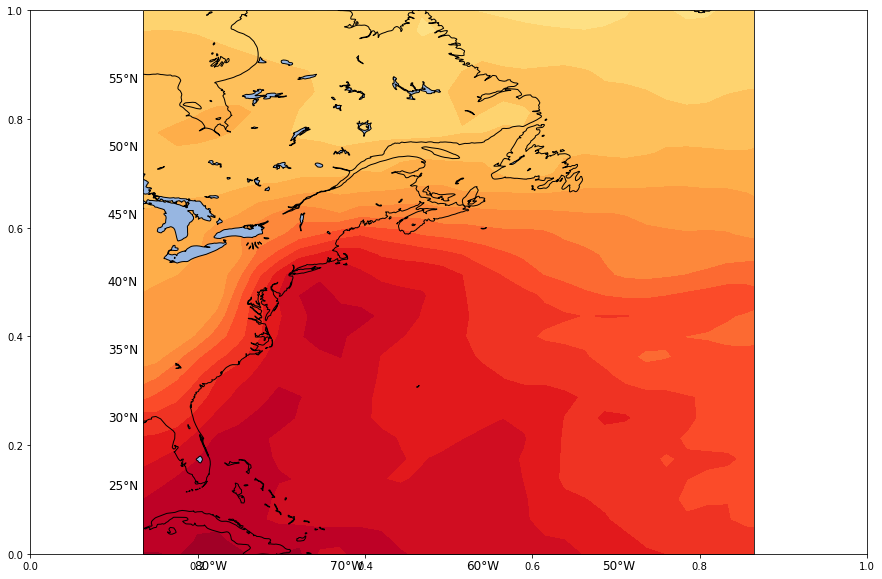

In [35]:
#Plot of preciptable water vapor of Tropical Cyclones 

pwv_all = pwv['pwv']
pwv_TC= pwv_all[[0,1,2,3,5,7,8,9,13,14,15,18,19,20,21,22,23,24,25,30,31,32,34,35,37,41,43,46,49],:,:].mean(dim = 'time') 

# This line describes the data projection
plt.subplots(figsize = (15,10))
projection_crs = ccrs.PlateCarree()
cmap_full = 'YlOrRd'

ax = plt.axes(projection=projection_crs)
ax.add_feature(cartopy.feature.LAKES,edgecolor='k')
ax.set_extent([-85, -40, 20, 60], crs=ccrs.PlateCarree())
ax.coastlines(resolution='50m')

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.top_labels = False
gl.right_labels = False
#gl.xlocator = mticker.FixedLocator([-75,-60,-45])
#gl.ylocator = mticker.FixedLocator([24,30,36,42,48,54])
gl.xlabel_style = {'size': 12}
gl.ylabel_style = {'size': 12}
gl.xlines = False
gl.ylines = False

min_val=0.
max_val=50.

norm_data=pwv_TC

norm_data[0,0]=min_val
norm_data[0,-1]=max_val

cf1= ax.contourf(lon_pwv,lat_pwv, norm_data.values,\
                  transform=projection_crs, cmap=cmap_full,levels = 20,\
                  alpha=1, vmin=min_val, vmax=max_val)
# This is a call to the above function that I created
add_coast(ax,ccrs)

ticks = np.linspace(min_val, max_val,11)
c_label = '[mm hr-1]'
plt.colorbar(cf1,ax=[ax1],shrink=.75, aspect=21, pad=0.05,\
             ticks=ticks, label=c_label)

NameError: name 'add_coast' is not defined

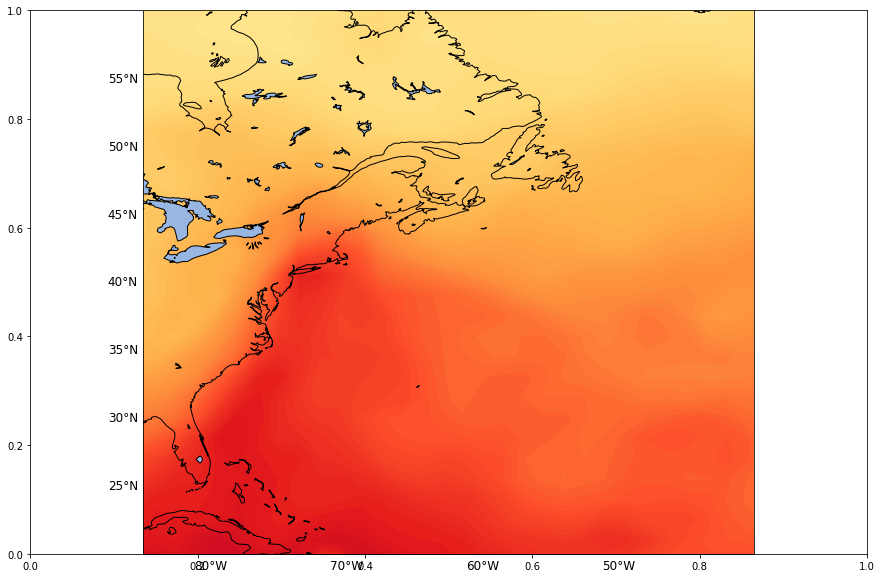

In [34]:
#Plot of precipitable water vapor of Non-Tropical Cyclones 

pwv_all = pwv['pwv']
pwv_NTC= pwv_all[[4,6,10,11,12,16,17,18,26,27,28,29,33,36,38,39,40,42,44,45,47,48],:,:].mean(dim = 'time') 

# This line describes the data projection
plt.subplots(figsize = (15,10))
projection_crs = ccrs.PlateCarree()
cmap_full = 'YlOrRd'

ax = plt.axes(projection=projection_crs)
ax.add_feature(cartopy.feature.LAKES,edgecolor='k')
ax.set_extent([-85, -40, 20, 60], crs=ccrs.PlateCarree())
ax.coastlines(resolution='50m')

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.top_labels = False
gl.right_labels = False
#gl.xlocator = mticker.FixedLocator([-75,-60,-45])
#gl.ylocator = mticker.FixedLocator([24,30,36,42,48,54])
gl.xlabel_style = {'size': 12}
gl.ylabel_style = {'size': 12}
gl.xlines = False
gl.ylines = False

min_val=0.
max_val=50.

norm_data=pwv_NTC

norm_data[0,0]=min_val
norm_data[0,-1]=max_val

cf1= ax.contourf(lon_pwv,lat_pwv, norm_data.values,\
                  transform=projection_crs, cmap=cmap_full,levels = 100,\
                  alpha=1, vmin=min_val, vmax=max_val)
# This is a call to the above function that I created
add_coast(ax,ccrs)

ticks = np.linspace(min_val, max_val,11)
c_label = '[mm hr-1]'
plt.colorbar(cf1,ax=[ax1],shrink=.75, aspect=21, pad=0.05,\
             ticks=ticks, label=c_label)

NameError: name 'add_coast' is not defined

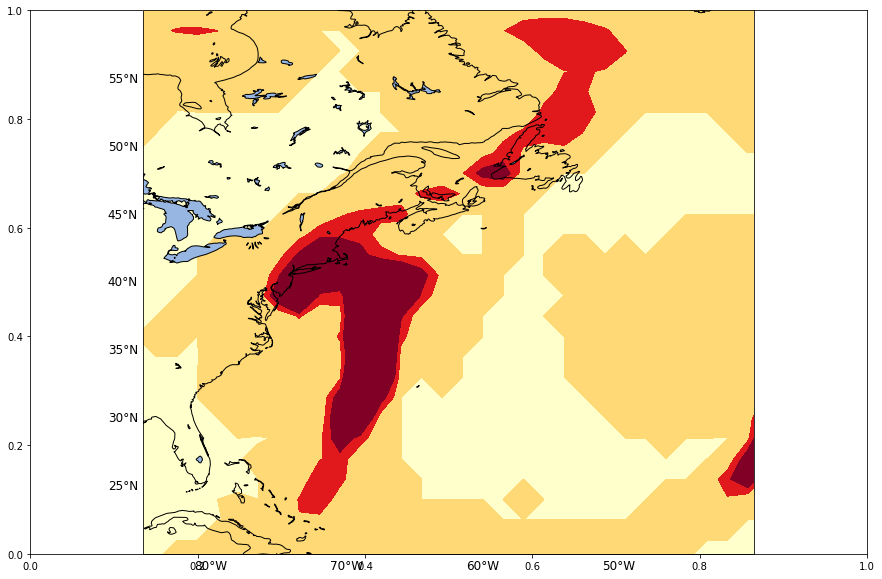

In [33]:
#Plot of precipitation on March 30th, 2021

prec_all = prec['prec']
prec_spec= prec_all[37,:,:]  

# This line describes the data projection
plt.subplots(figsize = (15,10))
projection_crs = ccrs.PlateCarree()
cmap_full = 'YlOrRd'

ax = plt.axes(projection=projection_crs)
ax.add_feature(cartopy.feature.LAKES,edgecolor='k')
ax.set_extent([-85, -40, 20, 60], crs=ccrs.PlateCarree())
ax.coastlines(resolution='50m')

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.top_labels = False
gl.right_labels = False
#gl.xlocator = mticker.FixedLocator([-75,-60,-45])
#gl.ylocator = mticker.FixedLocator([24,30,36,42,48,54])
gl.xlabel_style = {'size': 12}
gl.ylabel_style = {'size': 12}
gl.xlines = False
gl.ylines = False

min_val=0.
max_val=1.

norm_data=prec_spec

norm_data[0,0]=min_val
norm_data[0,-1]=max_val

cf1= ax.contourf(lon_prec,lat_prec, norm_data.values,\
                  transform=projection_crs, cmap=cmap_full,levels = 30,\
                  alpha=1, vmin=min_val, vmax=max_val)
# This is a call to the above function that I created
add_coast(ax,ccrs)

ticks = np.linspace(min_val, max_val,11)
c_label = '[mm hr-1]'
plt.colorbar(cf1,ax=[ax1],shrink=.75, aspect=21, pad=0.05,\
             ticks=ticks, label=c_label)

NameError: name 'add_coast' is not defined

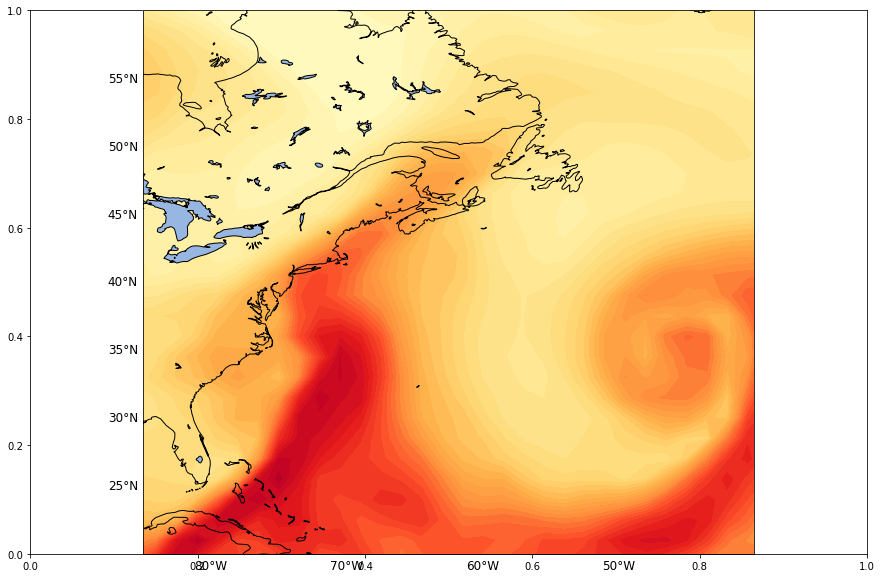

In [41]:
#Plot of precipitable water vapor on March 30th, 2010 

pwv_all = pwv['pwv']
pwv_spec= pwv_all[37,:,:]  

# This line describes the data projection
plt.subplots(figsize = (15,10))
projection_crs = ccrs.PlateCarree()
cmap_full = 'YlOrRd'

ax = plt.axes(projection=projection_crs)
ax.add_feature(cartopy.feature.LAKES,edgecolor='k')
ax.set_extent([-85, -40, 20, 60], crs=ccrs.PlateCarree())
ax.coastlines(resolution='50m')

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.top_labels = False
gl.right_labels = False
#gl.xlocator = mticker.FixedLocator([-75,-60,-45])
#gl.ylocator = mticker.FixedLocator([24,30,36,42,48,54])
gl.xlabel_style = {'size': 12}
gl.ylabel_style = {'size': 12}
gl.xlines = False
gl.ylines = False

min_val=0.
max_val=50.

norm_data=pwv_spec

norm_data[0,0]=min_val
norm_data[0,-1]=max_val

cf1= ax.contourf(lon_pwv,lat_pwv, norm_data.values,\
                  transform=projection_crs, cmap=cmap_full,levels = 50,\
                  alpha=1, vmin=min_val, vmax=max_val)
# This is a call to the above function that I created
add_coast(ax,ccrs)

ticks = np.linspace(min_val, max_val,11)
c_label = '[mm hr-1]'
plt.colorbar(cf1,ax=[ax1],shrink=.75, aspect=21, pad=0.05,\
             ticks=ticks, label=c_label)